In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path=r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data'

In [4]:
# Import the “df_sub.pkl” file into Jupyter as df_sub

df_sub = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_sub.pkl'))

In [5]:
df_sub.columns

Index(['trip_duration', 'start_time', 'stop_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'birth_year', 'gender', 'age', 'age_group_loc',
       'trip_duration_range_loc', 'station_users', 'day_of_week',
       'hour_of_day'],
      dtype='object')

## Step 3. Clean your data so that it’s ready for analysis.

In [7]:
# Check for missing values

df_sub.isnull().sum()

trip_duration                   0
start_time                      0
stop_time                       0
start_station_id              676
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                676
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
birth_year                 402411
gender                          0
age                        402411
age_group_loc              402411
trip_duration_range_loc         0
station_users                 676
day_of_week                     0
hour_of_day                     0
dtype: int64

In [16]:
df_sub['day_of_week']. value_counts(dropna = False)

Wed.      1978555
Tues.     1918836
Thurs.    1907495
Fri.      1871204
Mon.      1807954
Sat.      1622931
Sun.      1463204
Name: day_of_week, dtype: int64

/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

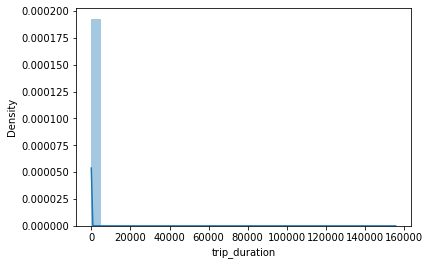

In [8]:
# Show extreme values

sns.distplot(df_sub['trip_duration'], bins=30)

In [9]:
# Check the mean

df_sub['trip_duration'].mean()

16.05046930517076

In [10]:
# Check the median

df_sub['trip_duration'].median()

10.166666666666666

In [11]:
# Check the max

df_sub['trip_duration'].max()

155671.01666666666

## Step 4. Explore your data visually 

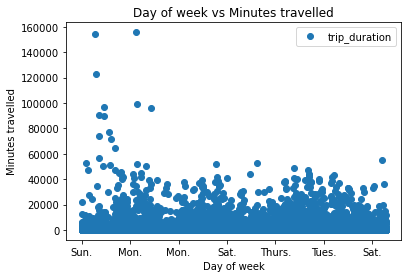

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_sub.plot(x = 'day_of_week', y='trip_duration',style='o')
plt.title('Day of week vs Minutes travelled')  
plt.xlabel('Day of week')  
plt.ylabel('Minutes travelled')  
plt.show()

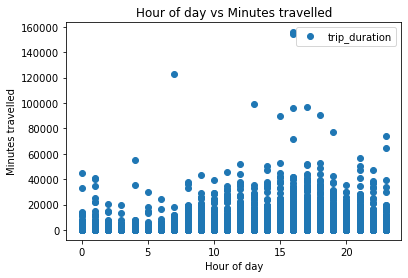

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_sub.plot(x = 'hour_of_day', y='trip_duration',style='o')
plt.title('Hour of day vs Minutes travelled')  
plt.xlabel('Hour of day')  
plt.ylabel('Minutes travelled')  
plt.show()

## Hypothesis
### People travel for longer periods of time between 08:00 - 19:00

## Steps 6 & 7. Reshape the variables into NumPy arrays and split them into two sets

In [25]:
X = df_sub['hour_of_day'].values.reshape(-1,1)
y = df_sub['trip_duration'].values.reshape(-1,1)

In [26]:
X

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [23],
       [23],
       [23]])

In [27]:
y

array([[  11.33333333],
       [  10.35      ],
       [   4.25      ],
       ...,
       [  22.63333333],
       [  29.5       ],
       [2034.98333333]])

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Step 8. Run a linear regression on the data

In [29]:
# Create a regression object.

regression = LinearRegression()

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## Step 9. Create a plot that shows the regression line on the test set

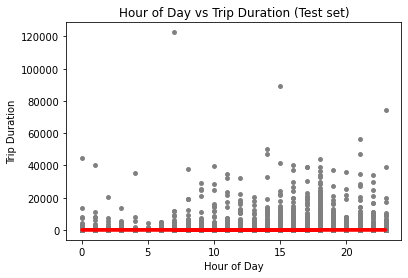

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Hour of Day vs Trip Duration (Test set)')
plot_test.xlabel('Hour of Day')
plot_test.ylabel('Trip Duration')
plot_test.show()

### The regression line appears to be horizontal and does not cover all my data points. There are many points that look like outliers and this could affect the results.

## Step 11. Check the model performance statistics

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [34]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20310947]]
Mean squared error:  35936.88504652867
R2 score:  2.9352920412506478e-05


In [ ]:
# The slope is positive slope which indicates a positive relationship (as X rises, so does y).
# the MSE is quite large at 35936.885. From this, it’s safe to say that a regression may not be the best model
# to represent this data and can’t accurately predict the influence of the each hour on the minutes travelled.
# The R2 score of the model is 2.9352920412506478e-05. This is very low, which means that my model is not that great
# of a fit.

In [35]:
y_predicted

array([[14.64303581],
       [15.65858315],
       [16.06480209],
       ...,
       [17.08034942],
       [17.89278729],
       [16.87723996]])

## Step 12. Compare the predicted y values with the actual y values 

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.716667,14.643036
1,7.183333,15.658583
2,9.166667,16.064802
3,5.400000,17.283459
4,10.500000,15.861693
5,12.983333,14.846145
6,8.183333,15.252364
7,8.283333,15.658583
8,22.833333,15.861693
9,9.216667,17.080349


### There is a significant difference between the actual and predicted y values. This is more evidence my model is not doing good for explaining the relationship between the “Days of week” and “Trip duration” variables.

In [37]:
# Run model on my training data set

y_predicted_train = regression.predict(X_train)

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20310947]]
Mean squared error:  39781.12977534681
R2 score:  2.441613657910846e-05


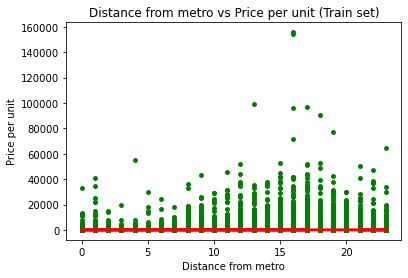

In [40]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Train set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

### The model does not appear to be overfitted.
### I cannot think of any type of bias that could affect this model as there are no data on specific groups or PII.